# 1. Perkenalan
- Nama : Muhammad Julizar
- Batch : FTDS-RMT-16

# Query from BigQuery
```
select 
      age, workclass,education, education_num, 
      marital_status, occupation, relationship, 
      race, sex, capital_gain, capital_loss, 
      hours_per_week, native_country,income_bracket
from bigquery-public-data.ml_datasets.census_adult_income
where workclass != ' ?'  and hours_per_week < 100
limit 31984
```
`Notes :  walaupun sudah di limit 31984 baris, data yang didapatkan dengan filter yang sudah ditentukan adalah 30725 baris`
## Dataset : Adult Census Income
## Objective : Memprediksi income bracket menggunakan Logistic Regression dan SVM

# 2. Import Library

In [1]:
# Import Library 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# 3. Data Loading

In [2]:
# loading dataset

df = pd.read_csv('D:\Hacktiv 8\Full time Data Science\Phase 1\Graded_Challange\Graded_challange2\h8dsft_P1G2_Muhammad_Julizar.csv')

In [3]:
# Melihat 5 data awal

df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,18,Never-worked,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K
1,37,Private,12th,8,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,0,33,?,<=50K
2,39,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Sales,Wife,Black,Female,0,0,54,Dominican-Republic,>50K
3,29,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,18,United-States,<=50K
4,64,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,21,United-States,<=50K


In [4]:
# Melihat 5 data terakhir

df.tail()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
30720,50,Self-emp-inc,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,70,Germany,<=50K
30721,21,Private,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,Female,0,0,70,United-States,<=50K
30722,32,Private,Some-college,10,Separated,Machine-op-inspct,Unmarried,Black,Female,0,0,70,United-States,<=50K
30723,39,Private,HS-grad,9,Divorced,Machine-op-inspct,Not-in-family,Black,Female,0,0,70,United-States,<=50K
30724,20,Private,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,70,United-States,<=50K


In [5]:
# Melihat info data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30725 entries, 0 to 30724
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30725 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       30725 non-null  object
 3   education_num   30725 non-null  int64 
 4   marital_status  30725 non-null  object
 5   occupation      30725 non-null  object
 6   relationship    30725 non-null  object
 7   race            30725 non-null  object
 8   sex             30725 non-null  object
 9   capital_gain    30725 non-null  int64 
 10  capital_loss    30725 non-null  int64 
 11  hours_per_week  30725 non-null  int64 
 12  native_country  30725 non-null  object
 13  income_bracket  30725 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.3+ MB


Dari data kita dapatkan informai yaitu:
- Total row : 30725 dan 14 kolom
- Tidak terdapat missing value

In [6]:
# Melihat central tendency dari kolom numerical 

df.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,30725.000000,30725.000000,30725.000000,30725.000000,30725.000000
mean,38.439512,10.129699,1105.785094,88.889959,40.946461
std,13.119665,2.562702,7497.027762,405.613208,11.987385
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


Dari informasi diatas didapatkan bahwa capital_gain dan capital loss merupakan natural outlier.
<br>Pada kolom age saya rasa memiliki banyak outlier

# 4. Exploratory Data Analysis (EDA)

In [7]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,18,Never-worked,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K
1,37,Private,12th,8,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,0,33,?,<=50K
2,39,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Sales,Wife,Black,Female,0,0,54,Dominican-Republic,>50K
3,29,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,18,United-States,<=50K
4,64,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,21,United-States,<=50K


In [8]:
# Melihat total unique value dari setiap kolom

df.nunique()

age                72
workclass           8
education          16
education_num      16
marital_status      7
occupation         15
relationship        6
race                5
sex                 2
capital_gain      118
capital_loss       90
hours_per_week     94
native_country     42
income_bracket      2
dtype: int64

## Categorical

In [9]:
# Tipe tipe workclass

df.groupby('workclass')[['workclass']].count()

,workclass
workclass,
Federal-gov,960
Local-gov,2093
Never-worked,7
Private,22696
Self-emp-inc,1116
Self-emp-not-inc,2541
State-gov,1298
Without-pay,14


In [10]:
# Memeriksa status pernikahan

df.groupby('marital_status')[['marital_status']].count()

,marital_status
marital_status,
Divorced,4259
Married-AF-spouse,21
Married-civ-spouse,14340
Married-spouse-absent,389
Never-married,9917
Separated,959
Widowed,840


Dari data tersebut sepertinya hanya terdapat 2 status inti yaitu menikah dan tidak menikah

In [11]:
# Memeriksa hubungan berdasarkan banyaknya income_bracket

df.groupby('relationship')[['income_bracket']].count().sort_values(by='income_bracket', ascending=False)

,income_bracket
relationship,
Husband,12704
Not-in-family,7866
Own-child,4530
Unmarried,3271
Wife,1436
Other-relative,918


In [12]:
# Melihat tipe-tipe pekerjaan

df.groupby('occupation')[['occupation']].count()

,occupation
occupation,
?,7
Adm-clerical,3770
Armed-Forces,9
Craft-repair,4099
Exec-managerial,4066
Farming-fishing,994
Handlers-cleaners,1370
Machine-op-inspct,2002
Other-service,3295


Terdapat Data '?' pada kolom occupation yang bejumlah 7 baris.

<AxesSubplot: xlabel='native_country'>

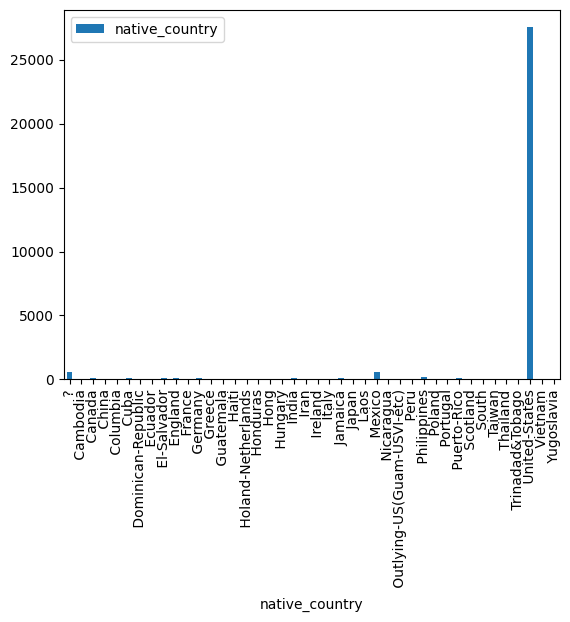

In [13]:
# Melihat banyaknya negara pada dataset
df.groupby('native_country')[['native_country']].count().plot(kind='bar')

United states sangat mendominasi dibandingkan negara-negara lain

<AxesSubplot: xlabel='sex', ylabel='count'>

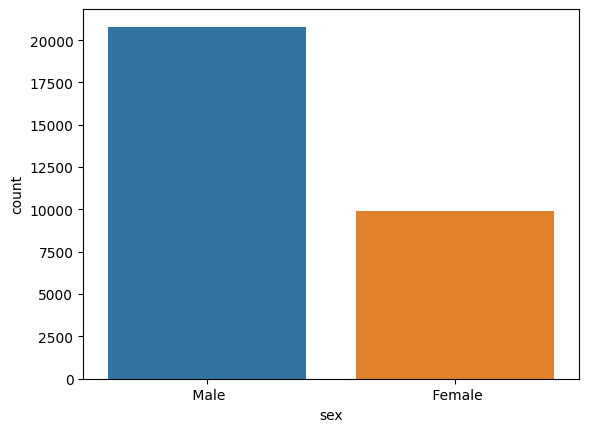

In [14]:
# Melihat perbandingan gender 

sns.countplot(x=df['sex'], data=df)

## Numerical

<AxesSubplot: xlabel='capital_loss'>

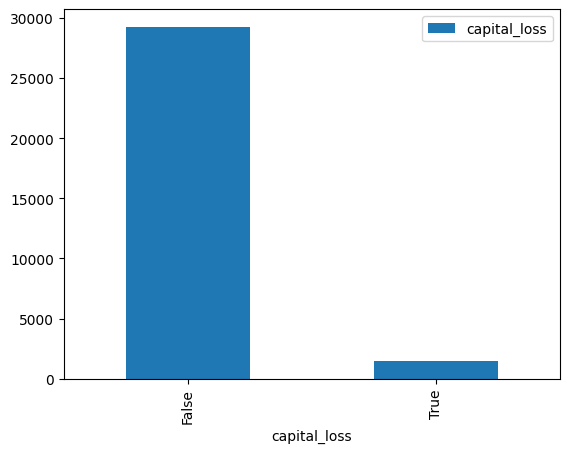

In [15]:
# Melihat banyaknya perbandingan capital loss yang valuenya 0 dan lebih dari 0

df.groupby(df['capital_loss'] > 0)[['capital_loss']].count().plot(kind='bar')

In [16]:
# Membuat fungsi skewness

def skewnes(data):
    print(f'Nilai Skewness kolom {data.name} : {data.skew()}')
    if data.skew() > 0.5:
        print('Right Skewed')
    elif data.skew()< -0.5:
        print('Left Skewed')
    else:
        print('Normal Distribution')

Nilai Skewness kolom age : 0.5316675402543493
Right Skewed
None


<AxesSubplot: xlabel='age', ylabel='Count'>

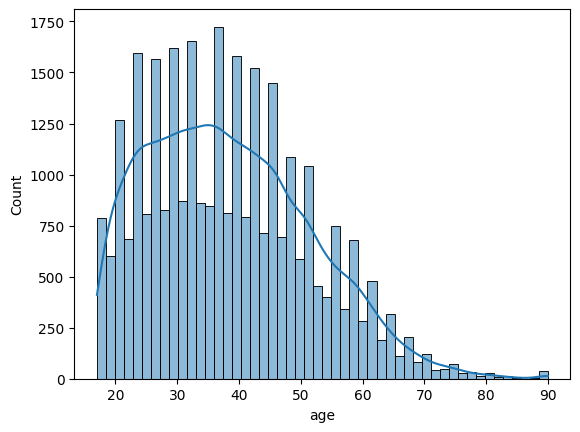

In [17]:
# Memeriksa distribusi data kolom skewness

print(skewnes(df.age))
sns.histplot(x=df['age'], kde=True, bins=50)

Dari hasil didapatkan kolom age memiliki distribusi data yang sedikit skewed sebesar 0.53

Nilai Skewness kolom hours_per_week : 0.3307490496608131
Normal Distribution
None


<AxesSubplot: xlabel='hours_per_week', ylabel='Count'>

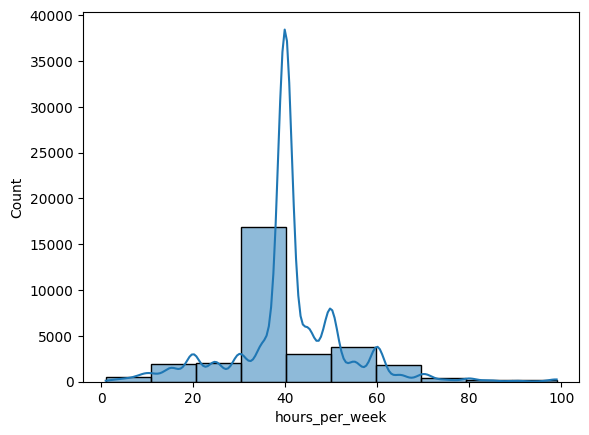

In [18]:
# Memeriksa distribusi data  kolom hours perweek

print(skewnes(df.hours_per_week))
sns.histplot(x=df['hours_per_week'], kde=True, bins=10)



Distribusi pada kolom hours per week tergolong normal

<AxesSubplot: xlabel='capital_gain'>

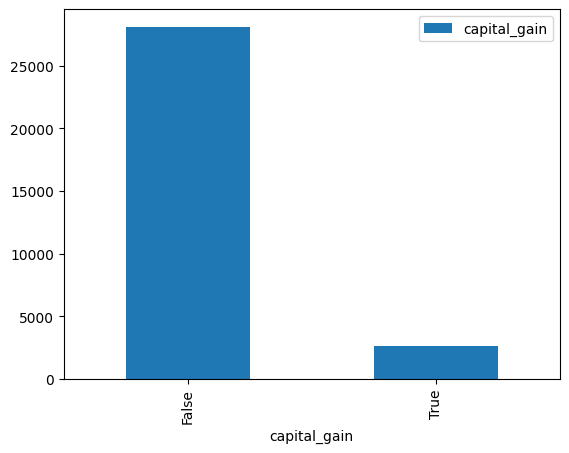

In [20]:
df.groupby(df['capital_gain'] > 0)[['capital_gain']].count().plot(kind='bar')

# 5. Data Preprocessing

In [21]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,18,Never-worked,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K
1,37,Private,12th,8,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,0,33,?,<=50K
2,39,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Sales,Wife,Black,Female,0,0,54,Dominican-Republic,>50K
3,29,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,18,United-States,<=50K
4,64,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,21,United-States,<=50K


In [22]:
# Mengambil 50 data sample atau inference

data_inf = df.sample(30, random_state= 99)
data_inf.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
15243,60,Private,7th-8th,4,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
16671,47,Federal-gov,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,Male,0,0,40,United-States,<=50K
12383,35,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
4956,57,Self-emp-inc,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,1902,30,United-States,>50K
28292,41,Self-emp-inc,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Male,0,0,55,United-States,<=50K


In [23]:
# Menghapus data inference yg sudah diambil dari data original

df1 = df.drop(data_inf.index)
df1.reset_index(drop=True, inplace=True)
df1.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,18,Never-worked,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K
1,37,Private,12th,8,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,0,33,?,<=50K
2,39,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Sales,Wife,Black,Female,0,0,54,Dominican-Republic,>50K
3,29,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,18,United-States,<=50K
4,64,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,21,United-States,<=50K


Menurut saya kolom `education` sudah diwakili dengan kolom `education_num` dan kolom 'race' tidak ada korelasinya dengan income_bracket. sehingga perlu dihapus kolom tersebut

In [25]:
# Memeberi nama baru pada kolom tertentu

df1 = df1.rename(columns={'education_num': 'level_education', 'occupation':'job'})

## Split Data

In [26]:
# Memisahkan feature dan target 

X = df1.drop(columns={'income_bracket'})
y = df1['income_bracket']

In [27]:
#Splitting data train dan data test

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=10)

print('Train size : ', X_train.shape, y_train.shape)
print('Test szie', X_test.shape, y_test.shape)

Train size :  (24556, 13) (24556,)
Test szie (6139, 13) (6139,)


## Handling Missing Value

Pada EDA Terdapat banyak value '?' pada kolom occupation dan native country, dikarenakan value '?' hanya terdapat 7 baris pada kolom occupation dan 556 baris pada kolom native_country. <br>
sehingga pada kolom occupation treatment terbaik adalah dihapus sedangkan pada kolom native_country akan di replace dengan modus pada kolom tersebut

In [28]:
# menghapus data pada kolom job yang tidak memiliki value aapapun

X_train = X_train[X_train['job'] != ' ?']
X_test = X_test[X_test['job'] != ' ?']

# menyamakan index y dan X pada data test
y_test = y_test.loc[X_test.index]


In [30]:
country_mode = X_train.native_country.mode()[0]
X_train['native_country'] = X_train['native_country'].replace(' ?',country_mode)
X_test['native_country'] = X_test['native_country'].replace(' ?',country_mode)


In [32]:
X_train.head()

,age,workclass,education,level_education,marital_status,job,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
23047,46,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States
20241,31,Private,11th,7,Never-married,Transport-moving,Unmarried,White,Male,0,0,40,United-States
5205,76,Local-gov,Some-college,10,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,30,United-States
29835,49,Private,Bachelors,13,Divorced,Exec-managerial,Not-in-family,Black,Female,27828,0,60,United-States
7252,43,Self-emp-inc,Bachelors,13,Divorced,Farming-fishing,Not-in-family,White,Male,0,0,35,United-States


## Handling outlier


In [33]:
X_train.describe()


,age,level_education,capital_gain,capital_loss,hours_per_week
count,24550.000000,24550.000000,24550.000000,24550.000000,24550.000000
mean,38.500367,10.131039,1075.022240,87.824033,40.969695
std,13.108197,2.558242,7310.578925,402.456269,11.956030
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3900.000000,99.000000


In [34]:
# Memeriksa nilai skewness setiap kolom 

print(skewnes(X_train.age))
print(skewnes(X_train.level_education))
print(skewnes(X_train.capital_gain))
print(skewnes(X_train.capital_loss))
print(skewnes(X_train.hours_per_week))


Nilai Skewness kolom age : 0.5276515469000674
Right Skewed
None
Nilai Skewness kolom level_education : -0.31978885340171864
Normal Distribution
None
Nilai Skewness kolom capital_gain : 12.03403853238054
Right Skewed
None
Nilai Skewness kolom capital_loss : 4.513452287655176
Right Skewed
None
Nilai Skewness kolom hours_per_week : 0.31674423125914114
Normal Distribution
None


Dari data skewness diatas, terdapat 3 kolom yang memiliki distribusi tidak normal<br>
Untuk kolom capital_gain dan capital_loss saya kira tidak bisa di handle outliernya, karena data terlalu menumpuk pada value 0 hal itu jg menunjukkan bahwa data tersebut adalah natural outlier

In [85]:
# membuat fungsi IQR

def boundaries(data, variable):    
    IQR= data[variable].quantile(0.75) - data[variable].quantile(0.25)
    
    lower_limit = data[variable].quantile(0.25) - (IQR*1.5)
    upper_limit = data[variable].quantile(0.75) + (IQR*1.5)
    
    return lower_limit, upper_limit


lower_limit, upper_limit = boundaries(X_train, 'age')
lower_limit, upper_limit

(-0.5, 75.5)

In [87]:
# menyeleksi data outlier

X_train_no_outlilers = X_train[(X_train.age > lower_limit)&(X_train.age < upper_limit)] 
print(f'Jumlah row dan kolom : {X_train_no_outlilers.shape}')

print(f'Jumlah outlier pada kolom age : {len(X_train)-len(X_train_no_outlilers)}')

Jumlah row dan kolom : (24407, 13)
Jumlah outlier pada kolom age : 143


In [38]:
# menyamakan index X dengan y pada data train
y_train = y_train.loc[X_train_no_outlilers.index]


## Memisahkan Categorical column dan Numerical column

In [41]:
# membuat list data

num_columns = X_train_no_outlilers.select_dtypes(include = np.number).columns.tolist()
cat_columns = X_train_no_outlilers.select_dtypes(include= ['object']).columns.tolist()

print(num_columns)
print(cat_columns)

['age', 'level_education', 'capital_gain', 'capital_loss', 'hours_per_week']
['workclass', 'education', 'marital_status', 'job', 'relationship', 'race', 'sex', 'native_country']


In [42]:
# Split data categorical dan numerical train test

X_train_num = X_train_no_outlilers[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train_no_outlilers[cat_columns]
X_test_cat = X_test[cat_columns]

In [43]:
X_train_cat.head()

,workclass,education,marital_status,job,relationship,race,sex,native_country
23047,Self-emp-not-inc,Bachelors,Married-civ-spouse,Sales,Husband,White,Male,United-States
20241,Private,11th,Never-married,Transport-moving,Unmarried,White,Male,United-States
29835,Private,Bachelors,Divorced,Exec-managerial,Not-in-family,Black,Female,United-States
7252,Self-emp-inc,Bachelors,Divorced,Farming-fishing,Not-in-family,White,Male,United-States
26437,Local-gov,Masters,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States


In [44]:
# Mengganti value pada kolom marital status menjad 'married' dan 'single'

X_train_cat["marital_status"] = X_train_cat["marital_status"].replace([' Never-married',' Divorced',' Separated',' Widowed'], 'Single')
X_train_cat["marital_status"] = X_train_cat["marital_status"].replace([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse'], 'Married')

X_test_cat["marital_status"] = X_test_cat["marital_status"].replace([' Never-married',' Divorced',' Separated',' Widowed'], 'Single')
X_test_cat["marital_status"] = X_test_cat["marital_status"].replace([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse'], 'Married')
X_train_cat.head()

,workclass,education,marital_status,job,relationship,race,sex,native_country
23047,Self-emp-not-inc,Bachelors,Married,Sales,Husband,White,Male,United-States
20241,Private,11th,Single,Transport-moving,Unmarried,White,Male,United-States
29835,Private,Bachelors,Single,Exec-managerial,Not-in-family,Black,Female,United-States
7252,Self-emp-inc,Bachelors,Single,Farming-fishing,Not-in-family,White,Male,United-States
26437,Local-gov,Masters,Married,Prof-specialty,Husband,White,Male,United-States


In [45]:
# Membuat list unique tanpa value USA pada kolom native_country

countries = np.array(X_train_cat['native_country'].unique())
countries_test = np.array(X_test_cat['native_country'].unique())

word_other = np.delete(countries, 0)
word_other_cat = np.delete(countries_test, 0)

In [47]:
# mengganti value yg bukan USA pada native_country menjadi other
X_train_cat['native_country'] = X_train_cat['native_country'].replace(word_other, 'Other')
X_test_cat['native_country'] = X_test_cat['native_country'].replace(word_other_cat, 'Other')
X_train_cat.head(10)

,workclass,education,marital_status,job,relationship,race,sex,native_country
23047,Self-emp-not-inc,Bachelors,Married,Sales,Husband,White,Male,United-States
20241,Private,11th,Single,Transport-moving,Unmarried,White,Male,United-States
29835,Private,Bachelors,Single,Exec-managerial,Not-in-family,Black,Female,United-States
7252,Self-emp-inc,Bachelors,Single,Farming-fishing,Not-in-family,White,Male,United-States
26437,Local-gov,Masters,Married,Prof-specialty,Husband,White,Male,United-States
19544,Local-gov,Some-college,Married,Protective-serv,Husband,White,Male,United-States
23483,Private,Bachelors,Married,Craft-repair,Husband,White,Male,United-States
3752,Private,Assoc-voc,Single,Other-service,Not-in-family,White,Male,United-States
27066,Private,Masters,Married,Exec-managerial,Husband,White,Male,United-States
2801,Private,Some-college,Married,Prof-specialty,Husband,White,Male,United-States


## Feature selection numerical-categorical using ANOVA

In [49]:
# Melakukan feature selection dengan ANOVA
num_feature = SelectKBest(score_func=f_classif, k=4)
score = num_feature.fit_transform(X_train_num, y_train)

In [50]:
# Menyeleksi fitur

filter = num_feature.get_support() 
features = np.array(X_train_num.columns)

print(f'scores every column : \n{num_feature.scores_}')
print(f'Column Name: \n{features}')
print(f'Top 4 column yang memiliki score tertinggi: \n{features[filter]}')

scores every column : 
[1622.59379494 3012.35494002 1226.85353249  573.06361852 1372.52297974]
Column Name: 
['age' 'level_education' 'capital_gain' 'capital_loss' 'hours_per_week']
Top 4 column yang memiliki score tertinggi: 
['age' 'level_education' 'capital_gain' 'hours_per_week']


In [52]:
# Menghapus feature 

X_train_num = X_train_num.drop(columns={'capital_loss'})
X_test_num = X_test_num.drop(columns={'capital_loss'})

## Scalling

In [53]:
# melakukan scalling data

scaler = MinMaxScaler()

scaler.fit_transform(X_train_num)

X_train_scaled = scaler.transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)
X_train_scaled

array([[0.5       , 0.8       , 0.        , 0.44897959],
       [0.24137931, 0.4       , 0.        , 0.39795918],
       [0.55172414, 0.8       , 0.27828278, 0.60204082],
       ...,
       [0.51724138, 0.6       , 0.        , 0.60204082],
       [0.25862069, 0.53333333, 0.        , 0.34693878],
       [0.46551724, 0.86666667, 0.05178052, 0.39795918]])

## Encode Feature using OneHotEncoder

In [54]:
# melakukan encoding menggunakan OneHotEncoder

one_hot = OneHotEncoder(sparse=False)

one_hot.fit_transform(X_train_cat)

X_train_encoded = one_hot.transform(X_train_cat)
X_test_encoded = one_hot.transform(X_test_cat)

X_test_encoded.shape

(6138, 54)

## Encode Target using LabelEncoder

In [55]:
# melakukan encoding menggunakan LabelEncoder
label = LabelEncoder()

label.fit_transform(y_train)

y_train_encoded = label.transform(y_train)
y_test_encoded = label.transform(y_test)

y_train_encoded

array([1, 0, 1, ..., 0, 0, 1])

In [56]:
# menggaubngkan data yang sudah discalling dan encode

X_train_final = np.concatenate([X_train_scaled, X_train_encoded], axis=1)
X_test_final  = np.concatenate([X_test_scaled, X_test_encoded], axis=1)

# 6. Model Definition

Melakukan definition model dengan LogisticRegression dan Support Vector Machine

In [58]:
log_reg = LogisticRegression()

In [88]:
cls_svm = SVC()

# 7. Model Training

In [59]:
# fit data

log_reg.fit(X_train_final, y_train_encoded)

LogisticRegression()

## Logistic Regression

In [60]:
# Prediksi mengunakan logistic regression

y_pred_train = log_reg.predict(X_train_final) 
y_pred_test = log_reg.predict(X_test_final)
y_pred_train

array([1, 0, 1, ..., 1, 0, 1])

## Support Vector Machine

## SVM with default parameter

In [61]:
# memanggil model dan melakukan fit data

cls_svm = SVC()
cls_svm.fit(X_train_final, y_train_encoded)

SVC()

In [62]:
# Prediksi data 

y_pred_train_svm = cls_svm.predict(X_train_final) 
y_pred_test_svm = cls_svm.predict(X_test_final)
y_pred_train_svm


array([1, 0, 1, ..., 1, 0, 1])

## SVM with linear kernel

In [63]:
# Prediksi data dengan hyperparameter =linear
linear = SVC(kernel='linear')
linear.fit(X_train_final, y_train_encoded)

pred_svm1 = linear.predict(X_train_final) 
test_svm1 = linear.predict(X_test_final)
pred_svm1

## SVM with poly kernel

In [64]:
# Prediksi data dengan hyperparameter =poly

poly = SVC(kernel='poly')
poly.fit(X_train_final, y_train_encoded)

pred_svm2 = poly.predict(X_train_final) 
test_svm2 = poly.predict(X_test_final)
pred_svm2

array([1, 0, 1, ..., 1, 0, 1])

# 8. Model Evaluation

## Model Evaluation Logistic Regression

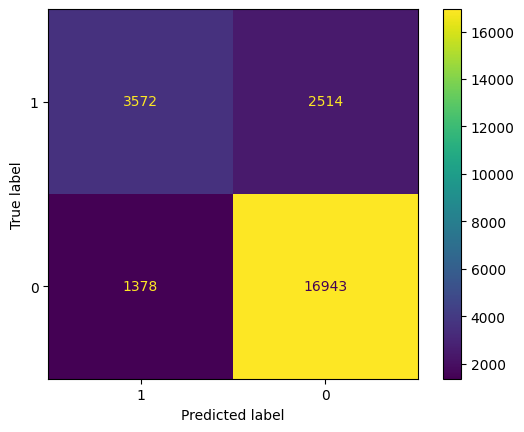

In [65]:
# Melihat confussion matrix 

cm = confusion_matrix(y_train_encoded, y_pred_train, labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[1,0])

disp.plot()
plt.show()

In [66]:
# Classification report pada data train

print(classification_report(y_train_encoded,y_pred_train))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     18321
           1       0.72      0.59      0.65      6086

    accuracy                           0.84     24407
   macro avg       0.80      0.76      0.77     24407
weighted avg       0.83      0.84      0.83     24407



In [67]:
# Classification report pada data test

print(classification_report(y_test_encoded,y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4604
           1       0.75      0.61      0.68      1534

    accuracy                           0.85      6138
   macro avg       0.81      0.77      0.79      6138
weighted avg       0.85      0.85      0.85      6138



### Hasil evaluasi model logistic regression
Pada model logistic regression nilai akurasi yang didapatkan setelah melakukan prediks pada data train sebesar 84% sedangkan pada data test memiliki akurasi sebesar 85%<br>

Nilai presisi penempatan <=50k yg sesuai pada klasifikasinya adalah sebesar 88%<br>
Nilai recall penempatan <=50k yang sesuai pada klasifikasinya adalah sebesar 93%<br>

Nilai presisi penempatan >50k yg sesuai pada klasifikasinya adalah sebesar 75%<br>
Nilai recall penempatan >50k yang sesuai pada klasifikasinya adalah sebesar 63%<br>

Hasil prediksi nilai f1 score pada saat memprediksi nilai <=50k mendapatkan score sebesar 90%<br>
Sedangkan pada saat memprediksi nilai >50k hanya mendapatkan 68%<br>

dapat disimpulkan bahwa model ini sangat baik saat memprediksi data <=50k dibandingkan memprediksi >50k

## Model Evaluation SVM

In [68]:
# memeriksa nilai akurasi model SVM dengan berbagai hyperparamter

print(f'accuracy SVM kernel Linear Train data : {round(accuracy_score(y_train_encoded, pred_svm1)*100,2)}')
print(f'accuracy SVM kernel Linear Test data : {round(accuracy_score(y_test_encoded, test_svm1)*100,2)}')
print(f'Selisih : {round((accuracy_score(y_test_encoded, test_svm1)-accuracy_score(y_train_encoded, pred_svm1))*100,2)}')

print('')
print(f'accuracy SVM kernel Poly Train data: {round(accuracy_score(y_train_encoded, pred_svm2)*100,2)}')
print(f'accuracy SVM kernel Poly Test Data : {round(accuracy_score(y_test_encoded, test_svm2)*100,2)}')
print(f'{round((accuracy_score(y_test_encoded, test_svm2) - accuracy_score(y_train_encoded, pred_svm2))*100,2)}')
print('')
print(f'accuracy SVM kernel rbf Train data : {round(accuracy_score(y_train_encoded, y_pred_train_svm)*100,2)}')
print(f'accuracy SVM kernel rbf Test data : {round(accuracy_score(y_test_encoded, y_pred_test_svm)*100,2)}')
print(f'{round((accuracy_score(y_test_encoded, y_pred_test_svm)-accuracy_score(y_train_encoded, y_pred_train_svm))*100,2)}')

accuracy SVM kernel Linear Train data : 84.22
accuracy SVM kernel Linear Test data : 85.17
Selisih : 0.95

accuracy SVM kernel Poly Train data: 84.3
accuracy SVM kernel Poly Test Data : 84.38
0.08

accuracy SVM kernel rbf Train data : 83.72
accuracy SVM kernel rbf Test data : 83.84
0.12


Dari nilai akurasi, didapatkan model terbaik dengan hyperparameter kernel "poly" dikarenakan memiliki selisih akurasi antara train dan test yang sangat sedikit

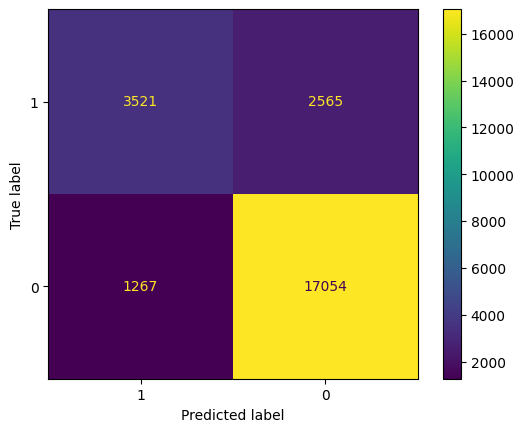

In [69]:
# Melihat confussion matrix model SVM dengan kernel poly

cm = confusion_matrix(y_train_encoded, pred_svm2, labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[1,0])

disp.plot()
plt.show()

In [70]:
# Classification report pada data train

print(classification_report(pred_svm2,y_train_encoded))


              precision    recall  f1-score   support

           0       0.93      0.87      0.90     19619
           1       0.58      0.74      0.65      4788

    accuracy                           0.84     24407
   macro avg       0.75      0.80      0.77     24407
weighted avg       0.86      0.84      0.85     24407



In [71]:
# Classification report pada data train

print(classification_report(test_svm2,y_test_encoded))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      4929
           1       0.58      0.74      0.65      1209

    accuracy                           0.84      6138
   macro avg       0.76      0.80      0.77      6138
weighted avg       0.86      0.84      0.85      6138



### Hasil evaluasi model SVM

Pada model SVM dilakukan 3 kali pemodelan dengan memodifikasi kernel yang digunakan yaitu linear, poly dan rbf<br>
Dari hasil akurasi yang didapatkan model yang menggunakan kernel poly memiliki selisih nilai akurasi yang sangat kecil yakni 0.08 sehingga model tersebut merupakan model terbaik dari 3 model yang telah di coba<br>

Nilai presisi penempatan <=50k yg sesuai pada klasifikasinya adalah sebesar 93%<br>
Nilai recall penempatan <=50k yang sesuai pada klasifikasinya adalah sebesar 87%<br>

Nilai presisi penempatan >50k yg sesuai pada klasifikasinya adalah sebesar 58%<br>
Nilai recall penempatan >50k yang sesuai pada klasifikasinya adalah sebesar 74%<br>

Hasil prediksi nilai f1 score pada saat memprediksi nilai <=50k mendapatkan score sebesar 90%<br>
Sedangkan pada saat memprediksi nilai >50k hanya mendapatkan 65%<br>

dapat disimpulkan bahwa model ini sangat baik saat memprediksi data <=50k dibandingkan memprediksi >50k

# 9. Model Inference

In [72]:
# memeriksa data inference 

data_inf.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
15243,60,Private,7th-8th,4,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
16671,47,Federal-gov,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,Male,0,0,40,United-States,<=50K
12383,35,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
4956,57,Self-emp-inc,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,1902,30,United-States,>50K
28292,41,Self-emp-inc,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Male,0,0,55,United-States,<=50K


In [73]:
menentukan target

y = data_inf['income_bracket']


In [74]:
# melakukan label encoding pada target
le = LabelEncoder()
le.fit_transform(y)
y= le.transform(y)

# membuat target dalam bentuk data frame
data_actual = pd.DataFrame(y, columns=['Data actual'])
data_actual.head()

,Data actual
0,0
1,0
2,0
3,1
4,0


In [75]:
print(cat_columns)

['workclass', 'education', 'marital_status', 'job', 'relationship', 'race', 'sex', 'native_country']


In [76]:
# memilih kolom apa saja yang akan digunakan

X_num = data_inf[['age', 'education_num', 'capital_gain', 'hours_per_week']]
X_cat = data_inf[['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']]


In [77]:
# mengganti value pada kolom marital status dan native_country

X_cat["marital_status"] = X_cat["marital_status"].replace([' Never-married',' Divorced',' Separated',' Widowed'], 'Single')
X_cat["marital_status"] = X_cat["marital_status"].replace([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse'], 'Married')
X_cat['native_country'] = X_cat['native_country'].replace([' Canada', ' Mexico', ' South'], 'Other')

In [78]:
# scalling dan encoding data

inf_scaled = scaler.transform(X_num)
inf_encoded = one_hot.transform(X_cat)
inf_scaled

array([[0.74137931, 0.2       , 0.        , 0.39795918],
       [0.51724138, 0.8       , 0.        , 0.39795918],
       [0.31034483, 0.53333333, 0.        , 0.39795918],
       [0.68965517, 0.53333333, 0.        , 0.29591837],
       [0.4137931 , 0.53333333, 0.        , 0.55102041],
       [0.12068966, 0.6       , 0.        , 0.5       ],
       [0.77586207, 0.8       , 0.        , 0.39795918],
       [0.55172414, 0.26666667, 0.        , 0.39795918],
       [0.60344828, 0.6       , 0.        , 0.5       ],
       [0.79310345, 0.6       , 0.        , 0.5       ],
       [1.13793103, 0.53333333, 0.        , 0.07142857],
       [0.77586207, 0.26666667, 0.        , 0.24489796],
       [0.81034483, 0.8       , 0.        , 0.23469388],
       [0.43103448, 0.13333333, 0.        , 0.43877551],
       [0.31034483, 0.66666667, 0.        , 0.39795918],
       [0.22413793, 0.53333333, 0.        , 0.39795918],
       [0.13793103, 0.8       , 0.        , 0.34693878],
       [0.31034483, 0.8       ,

In [79]:
# menggabungkan data yang sudah di scale dan di encode

inf_final = np.concatenate([inf_scaled, inf_encoded], axis=1)


## Prediksi model logistic regression dengan data inference

In [80]:
# Prediksi menggunakan logistic regression

inf_predict = log_reg.predict(inf_final)
value_predict = pd.DataFrame(inf_predict, columns=['Data prediksi'])
perbandingan = pd.concat([data_actual, value_predict],  axis=1)
perbandingan

,Data actual,Data prediksi
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
5,1,0
6,1,0
7,0,0
8,0,0
9,0,0


Terdapat beberapa kesalahan prediksi pada hasil prediksi jika dibandingkan dengan data akktual 

## Prediksi Model SVM dengan data inference, dengan hyperparameter kernel=poly

Saya memilih kernel poly dikarenakan, kernel tersebut yg memiliki kriteria goodfit dengan selisih paling sedikit antara test data dan train data

In [81]:
# Prediksi menggunakan model SVM dengan hyperparameter poly

pred_svm = poly.predict(inf_final)
pred_svm

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [82]:
# membandingkan data aktual dan data prediksi 

prediksi_svm = pd.DataFrame(pred_svm, columns=['Data prediksi'])
prediksi_svm= pd.concat([data_actual, prediksi_svm],  axis=1)
prediksi_svm

,Data actual,Data prediksi
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
5,1,1
6,1,0
7,0,0
8,0,0
9,0,0


In [83]:
print(f'Nilai akurasi prediksi SVM : {round(accuracy_score(pred_svm, data_actual),2)}')
print(f'Nilai akurasi prediksi logistic regression : {round(accuracy_score(inf_predict, data_actual),2)}')

Nilai akurasi prediksi SVM : 0.83
Nilai akurasi prediksi logistic regression : 0.83


Setelah dilakukan prediksi, perbandingan antara data aktual dan data prediksi menggunakan data inference didapatkan nilai akurasi model SVM dan model logistic regression 83% sehingga masi terdapat beberapa kesalahan prediksi terhadap target aktual

# 10. Kesimpulan

## A. Model Analysis

1. Pada model logistic regression nilai akurasi yang didapatkan setelah melakukan prediks pada data train sebesar 84% sedangkan pada data test memiliki akurasi sebesar 85% <br>Hasil classification report dapat disimpulkan bahwa model ini sangat baik saat memprediksi data <=50k == (0) dibandingkan memprediksi >50k == (1)<br>

2. Pada model SVM dilakukan 3 kali pemodelan dengan cara memodifikasi hyperparameter pada model svm.<br>Pada pemodelan ini hyperparameter yg digunakan untuk diubah-ubah adalah kernel baik linear, poly maupun rbf<br>dari hasil prediksi didapatkan selisih terkecil antara train data dan test data saat menggunakan kernel poly yaitu sebesar 0.08%.<br> Hal ini menunjukkan bahwa model SVM dengan hyperparameter poly GOOD FIT dan sangat baik untuk memprediksi dataset adult census income agar dapat mendekati target


## B. Overall Analysis

1. Pada EDA dilakukan pengecekan terhadap data, baik kolom numerical maupun categorical seperti distribusi data, skewness, missing value dan lain-lain

2. Prediksi menggunakan SVM dan Logistic Regression metrics yang digunakan adalah Classification Report dan Accuracy score.<br>
Accuracy Score:
    - Pada model logistic regression nilai akurasi yang didapatkan setelah melakukan prediks pada data train sebesar 84% sedangkan pada data test memiliki akurasi sebesar 85%<br>
    - Pada model SVM dilakukan beberapa kali pemodelan dengan hyper parameter yang berbeda-beda namun dengan kernel poly didapatkan akurasi antara data train dan data test sebesar 84.3% dan 84.38% yang mana memiliki selisih akurasi paling kecil, hal ini menunjukkan model dengan kernel poly menunjukkan model yang paling baik<br><br>
a. Classification Report Logistic Regression <br>
Data train :<br>
Pada value 0 memiliki nilai presisi 87%, recall 92% dan f1 score 90%<br>
Pada value 1 memiliki nilai presisi 72%, recall 59% dan f1 score 65%<br><br>
Data test :<br>
Pada value 0 memiliki nilai presisi 87%, recall 92% dan f1 score 90%<br>
Pada value 1 memiliki nilai presisi 72%, recall 59% dan f1 score 65%<br>
 <br>
b. Classification Report SVM   
Data train :<br>
Pada value 0 memiliki nilai presisi 93%, recall 87% dan f1 score 90%<br>
Pada value 1 memiliki nilai presisi 58%, recall 74% dan f1 score 65%<br><br>
Data test :<br>
Pada value 0 memiliki nilai presisi 93%, recall 87% dan f1 score 90%<br>
Pada value 1 memiliki nilai presisi 58%, recall 74% dan f1 score 65%<br>

<br>


3. Dari kedua pemodelan antara LogisticRegression dan SVM memiliki kelebihan saat memprediksi pada value <=50K == (0) dan kekurangannya adalah saat memprediksi value >50K == 1 <br>

4. Dari hasil no 3 dapat kita lakukan improve untuk menaikkan prediksi pada value 1 agar tepat pada sasaran.<br>

5. Dilakukan pengujian model dengan data inference, dari hasil pengujian data inference masih terdapat kesalahan prediksi terhadap data aktual namun model sudah cukup baik untuk memprediksi hingga 83% baik LogisticRegression maupun SVM

## Pertanyaan

1. Apakah yang dimaksud dengan coeficient pada logistic regression?
2. Apakah yang dimaksud dengan Support Vector pada SVM?
3. Apakah fungsi parameter kernel pada SVM? Jelaskan salah satu kernel yang kalian pahami!

### Jawaban no 1
Koefisien adalah suatu nilai yang berfungsi untuk menunjukkan hubungan antara variabel independen dan variabel dependen pada logistic regression

### Jawaban no 2
Support Vector merupakan titik data atau vector yang paling dekat dari hyperplane/pemisah

### Jawaban no 3
Kernel digunakan untuk memisahakan klasifikasi data, salah satu kernel adalah linear, kernel linear berfungsi untuk memisahkan data yang bersifat linear pada 2 dimensi
terdapat juga kernel rbf atau radial basis function atau gaussian, kernel ini lebih sering digunakan karena biasanya memiliki nilai akurasi yang tinggi, kernel ini memiliki dimensi yang infinite